In [25]:
import pandas as pd
import numpy as np

In [26]:
from sklearn.preprocessing import LabelBinarizer


def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer
    lb = LabelBinarizer()
    lb.fit(range(max(x)+1))
    b = lb.transform(x)
    return b

In [51]:
file = r'data/fer2013.csv'
df = pd.read_csv(file)

# Converting space separated pixels to int array


def string_to_int_array(item):
    return [int(p) for p in item.split()]


def get_X_and_y(df):
    X = [string_to_int_array(item) for item in df.iloc[:, 1].values]
    X = np.array(X) / 255.0
    y = np.array(df.iloc[:, 0].values)
    return X, np.array(one_hot_encode(y))


def get_training_set(data):
    not_class1 = data.loc[data['emotion'] != 1]
    class1 = data.loc[data['emotion'] == 1]
    class1_aug = class1
    # This is done to handle the class imbalance for emotion 1 which has only ~500 pics
    for i in range(11):
        class1_aug = class1_aug.append(class1)
    complete_training_set = not_class1.append(class1_aug)
    return get_X_and_y(complete_training_set)


def get_test_set(data):
    return get_X_and_y(data)


train_X, train_y = get_training_set(df.loc[df['Usage'] == 'Training'])
test_X, test_y = get_test_set(df.loc[df['Usage'] == 'PublicTest'])

print('First training value')
print(train_X[0])
print(train_y[0])

print(train_X.shape)
print(train_y.shape)

print('\nFirst test value')
print(test_X[0])
print(test_y[0])
print(test_X.shape)
print(test_y.shape)

First training value
[ 0.2745098   0.31372549  0.32156863 ...,  0.41568627  0.42745098
  0.32156863]
[1 0 0 0 0 0 0]
(33505, 2304)
(33505, 7)

First test value
[ 0.99607843  0.99607843  0.99607843 ...,  0.16470588  0.50588235
  0.70588235]
[1 0 0 0 0 0 0]
(3589, 2304)
(3589, 7)


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
train_X[0].shape

(2304,)

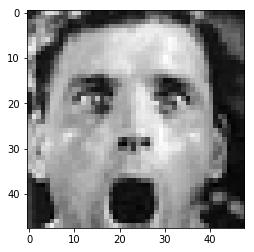

In [30]:
plt.imshow(train_X[29].reshape(48,48),cmap='gist_gray')

In [46]:
from sklearn.utils import shuffle
import tensorflow as tf
def get_batch(X, y, current_batch, batch_size):
    X_batch = X[current_batch * batch_size:(
        current_batch * batch_size + batch_size)]
    y_batch = y[current_batch * batch_size:(
        current_batch * batch_size + batch_size)]
    return X_batch, y_batch

In [55]:
num_batches = 100
batch_size = 30
epocs = 2
x = tf.placeholder(tf.float32, shape=[None, 2304])
W = tf.Variable(tf.zeros([2304, 7]))
b = tf.Variable(tf.zeros([7]))
y = tf.matmul(x, W) + b
y_true = tf.placeholder(tf.float32, [None, 7])
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(epocs):
        X, y = shuffle(train_X, train_y)
        for current_batch in range(num_batches):
            batch_X, batch_y = get_batch(X, y, current_batch, batch_size)
            sess.run(train, feed_dict={x: batch_X, y_true: batch_y})
    # Test the Train Model

    matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    print(test_X.shape)
    print(test_y.shape)
    print(sess.run(acc, feed_dict={x: test_X, y_true: test_y}))
    print('finished')

(3589, 2304)
(3589, 7)


InvalidArgumentError: Incompatible shapes: [33505] vs. [3589]
	 [[Node: Equal_7 = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ArgMax_14, ArgMax_15)]]

Caused by op 'Equal_7', defined at:
  File "/Users/jh80/anaconda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jh80/anaconda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-55-c8808f3c9d5c>", line 23, in <module>
    matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2455, in equal
    "Equal", x=x, y=y, name=name)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3306, in create_op
    op_def=op_def)
  File "/Users/jh80/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1669, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [33505] vs. [3589]
	 [[Node: Equal_7 = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ArgMax_14, ArgMax_15)]]
